In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Draw a bunch of dots
N = 1000 # The number of dots that you can experiment with
dots = np.random.rand(2, N) # The x and y coordinates of the dots

In [33]:
dist = np.zeros(N) # To store the distance between each of the dots and the center of the circle, (0.5, 0.5)
for i in range(N):
    dist[i] = np.sqrt((dots[0, i] - 0.5) ** 2 + (dots[1, i] - 0.5) ** 2) # Vectorizing this line will be nicer, but I'll just loop over the dots for pedagogical purposes
in_circle = (dist < 0.5) # Check whether the distance is less than the radius or not

# The area of the circle is pi * (r ** 2), and the area of the square is (2 * r) ** 2 where r = 0.5
# Therefore, the implied pi should be the proportion of the dots inside the circle times 4
implied_pi = np.sum(in_circle) / N * 4
print(implied_pi)

3.196


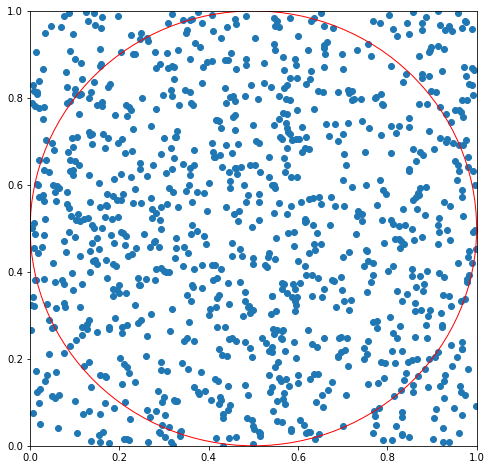

In [34]:
# Plot the dots
fig, ax = plt.subplots(figsize = (8, 8))

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

circle1 = plt.Circle((0.5, 0.5), 0.5, color='r', fill = False)
ax.add_patch(circle1)

ax.scatter(dots[0, :], dots[1, :])

fig.show()

In [39]:
# Compare different experiments

def pi_plot(N_list):
    len_list = len(N_list)
    fig, axes = plt.subplots(len_list, 1, figsize = (5, 5 * len_list))
    
    for i in range(len_list):
        dots = np.random.rand(2, N_list[i])
        dist = np.zeros(N_list[i])
        for j in range(N_list[i]):
            dist[j] = np.sqrt((dots[0, j] - 0.5) ** 2 + (dots[1, j] - 0.5) ** 2)
        in_circle = (dist < 0.5)
        
        axes[i].set_xlim((0, 1))
        axes[i].set_ylim((0, 1))

        circle1 = plt.Circle((0.5, 0.5), 0.5, color='r', fill = False)
        axes[i].add_patch(circle1)

        axes[i].scatter(dots[0, :], dots[1, :])
        
        axes[i].set_title(f"Experiment with {N_list[i]} dots with implied Pi {np.sum(in_circle) / N_list[i] * 4}")
    
    fig.show()
    return fig, axes

(<Figure size 360x1080 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Experiment with 100 dots with implied Pi 3.2'}>,
        <AxesSubplot:title={'center':'Experiment with 1000 dots with implied Pi 3.236'}>,
        <AxesSubplot:title={'center':'Experiment with 100000 dots with implied Pi 3.14592'}>],
       dtype=object))

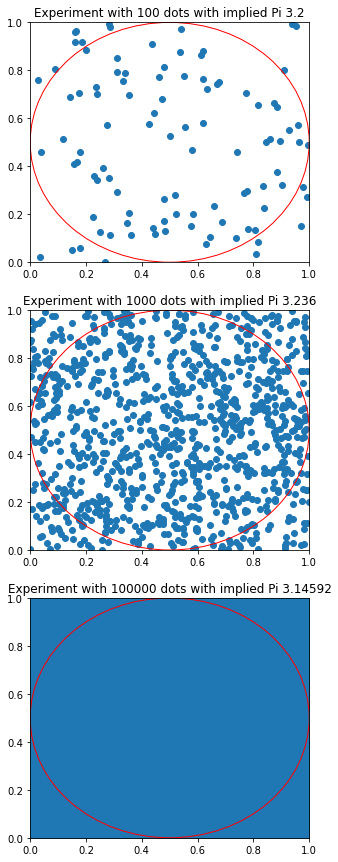

In [40]:
pi_plot([100, 1000, 100_000])